# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd

# Загружаем данные из файла Advertising.csv
try:
  df = pd.read_csv('data/Advertising.csv')

  # Выводим первые несколько строк для проверки
  print("Первые 5 строк данных:")
  print(df.head())

  # Выводим основную информацию о датасете
  print("\nИнформация о датасете:")
  print(df.info())

except FileNotFoundError:
  print("Ошибка: Файл 'Advertising.csv' не найден в текущей директории")
except Exception as e:
  print(f"Произошла ошибка при загрузке файла: {e}")


Первые 5 строк данных:
   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [2]:
# Проверяем наличие пропусков
print("Количество пропущенных значений в каждой колонке:")
print(df.isnull().sum())

print("\nОбщее количество пропущенных значений:")
print(df.isnull().sum().sum())

# Если есть пропуски, удаляем их
if df.isnull().sum().sum() > 0:
  df_clean = df.dropna()
  print("\nРазмер датасета до удаления пропусков:", df.shape)
  print("Размер датасета после удаления пропусков:", df_clean.shape)
else:
  print("\nВ датасете нет пропущенных значений!")

Количество пропущенных значений в каждой колонке:
Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Общее количество пропущенных значений:
0

В датасете нет пропущенных значений!


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [3]:
import numpy as np

# Выделяем признаки (X) - TV, radio, newspaper
X = df[['TV', 'radio', 'newspaper']].values

# Выделяем целевую переменную (y) - sales
y = df['sales'].values

# Проверяем размерности полученных массивов
print("Размерность массива признаков X:", X.shape)
print("Размерность массива целевой переменной y:", y.shape)

# Выводим первые 5 строк для проверки
print("\nПервые 5 строк массива признаков X:")
print(X[:5])
print("\nПервые 5 значений целевой переменной y:")
print(y[:5])

Размерность массива признаков X: (200, 3)
Размерность массива целевой переменной y: (200,)

Первые 5 строк массива признаков X:
[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]]

Первые 5 значений целевой переменной y:
[22.1 10.4  9.3 18.5 12.9]


## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [4]:
import numpy as np
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [5]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [6]:
# Создаем нулевой вектор весов w
w = np.zeros(X.shape[1])

# Реализуем координатный спуск
n_iterations = 1000

for iteration in range(n_iterations):
  # Вычисляем остаток r = y - X*w
  r = y - np.dot(X, w)

  # Проходим по всем признакам
  for j in range(X.shape[1]):
      # Вычисляем r_j = r + X_j * w_j
      r_j = r + X[:, j] * w[j]

      # Обновляем вес w_j = X_j * r_j
      w[j] = np.dot(X[:, j], r_j)

      # Обновляем остаток r = r - X_j * w_j
      r = r_j - X[:, j] * w[j]

# Выводим результаты
print("Веса модели линейной регрессии:")
print(f"w0 (свободный член): {w[0]:.4f}")
print(f"w1 (TV): {w[1]:.4f}")
print(f"w2 (radio): {w[2]:.4f}")
print(f"w3 (newspaper): {w[3]:.4f}")

# Проверяем качество модели
y_pred = np.dot(X, w)
r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)
print(f"\nR² score: {r2:.4f}")

# Выводим уравнение регрессии
equation = f"sales = {w[0]:.4f} + {w[1]:.4f}*TV + {w[2]:.4f}*radio + {w[3]:.4f}*newspaper"
print("\nУравнение регрессии:")
print(equation)

Веса модели линейной регрессии:
w0 (свободный член): 41.5622
w1 (TV): 110.1314
w2 (radio): 73.5286
w3 (newspaper): -0.5501

R² score: 0.8972

Уравнение регрессии:
sales = 41.5622 + 110.1314*TV + 73.5286*radio + -0.5501*newspaper


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [7]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [8]:
# Вычисляем среднее значение для каждого столбца
mean_X = np.mean(X, axis=0)

# Вычисляем стандартное отклонение для каждого столбца
std_X = np.std(X, axis=0)

# Выполняем стандартизацию
X_scaled = (X - mean_X) / std_X

# Выводим результаты
print("Средние значения признаков:")
print(f"TV: {mean_X[1]:.4f}")
print(f"radio: {mean_X[2]:.4f}")
print(f"newspaper: {mean_X[3]:.4f}")

print("\nСтандартные отклонения признаков:")
print(f"TV: {std_X[1]:.4f}")
print(f"radio: {std_X[2]:.4f}")
print(f"newspaper: {std_X[3]:.4f}")

print("\nПервые 5 строк масштабированной матрицы X:")
print(X_scaled[:5])

# Проверяем, что масштабирование выполнено корректно
print("\nПроверка: средние значения после масштабирования (должны быть близки к 0):")
print(np.mean(X_scaled, axis=0))
print("\nПроверка: стандартные отклонения после масштабирования (должны быть близки к 1):")
print(np.std(X_scaled, axis=0))

Средние значения признаков:
TV: 0.0611
radio: 0.0596
newspaper: 0.0576

Стандартные отклонения признаков:
TV: 0.0356
radio: 0.0380
newspaper: 0.0410

Первые 5 строк масштабированной матрицы X:
[[ 1.          0.96985227  0.98152247  1.77894547]
 [ 1.         -1.19737623  1.08280781  0.66957876]
 [ 1.         -1.51615499  1.52846331  1.78354865]
 [ 1.          0.05204968  1.21785493  1.28640506]
 [ 1.          0.3941822  -0.84161366  1.28180188]]

Проверка: средние значения после масштабирования (должны быть близки к 0):
[ 1.00000000e+00 -3.55271368e-17 -2.22044605e-16 -1.24344979e-16]

Проверка: стандартные отклонения после масштабирования (должны быть близки к 1):
[0. 1. 1. 1.]


**Добавим единичный столбец**

In [9]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [10]:
def mse_error(y_true, y_pred):
  """
  Вычисляет среднеквадратичную ошибку (MSE)

  Параметры:
  y_true: реальные значения
  y_pred: предсказанные значения

  Возвращает:
  float: значение MSE
  """
  # Вычисляем разность между реальными и предсказанными значениями
  error = y_true - y_pred

  # Возводим в квадрат и находим среднее
  mse = np.mean(error ** 2)

  return mse

# Проверим размерности
print("Размерность X:", X.shape)
print("Размерность w:", w.shape)

# Если X имеет размерность (200,5), а w - (4,), нужно использовать правильную матрицу X
# Используем только первые 4 столбца X для соответствия размерности w
X_correct = X[:, :4]
print("Размерность исправленной X:", X_correct.shape)

# Теперь вычислим предсказания
y_pred = np.dot(X_correct, w)

# Вычислим MSE
mse = mse_error(y, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.6f}")

Размерность X: (200, 5)
Размерность w: (4,)
Размерность исправленной X: (200, 4)
Среднеквадратичная ошибка (MSE): 1595.763921


**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [11]:
# Вычисляем среднее значение целевой переменной
y_mean = np.mean(y)

# Создаем вектор предсказаний, где каждое предсказание равно среднему значению
y_pred_naive = np.full_like(y, y_mean)

# Рассчитываем MSE для наивного прогноза
mse_naive = mse_error(y, y_pred_naive)

print(f"Среднее значение продаж: {y_mean:.2f}")
print(f"MSE наивного прогноза: {mse_naive:.6f}")

# Для сравнения выведем MSE нашей модели линейной регрессии
print(f"MSE модели линейной регрессии: {mse:.6f}")

Среднее значение продаж: 14.02
MSE наивного прогноза: 27.085744
MSE модели линейной регрессии: 1595.763921


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [12]:
def lin_pred(X, w):
  """
  Функция для получения прогнозов линейной модели

  Параметры:
  X : numpy.ndarray - матрица признаков размерности (n_samples, n_features)
  w : numpy.ndarray - вектор весов модели размерности (n_features,)

  Возвращает:
  numpy.ndarray - вектор прогнозов размерности (n_samples,)
  """
  # Проверяем соответствие размерностей
  if X.shape[1] != len(w):
      # Если количество столбцов X не соответствует длине w, 
      # используем только нужное количество столбцов
      X = X[:, :len(w)]

  # Вычисляем прогнозы как произведение матрицы признаков на вектор весов
  predictions = np.dot(X, w)

  return predictions

# Пример использования:
# Предполагая, что у нас есть X и w
try:
  y_pred = lin_pred(X, w)
  print("Размерность вектора прогнозов:", y_pred.shape)
  print("Первые 5 прогнозов:", y_pred[:5])
except NameError:
  print("Для проверки работы функции необходимо предоставить матрицу X и вектор весов w")

Размерность вектора прогнозов: (200,)
Первые 5 прогнозов: [56.3269178  50.65388792 49.81044167 53.92039814 54.85866155]


**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [13]:
def stoch_grad_step(X, y, w, train_ind, eta):
  """
  Выполняет шаг стохастического градиентного спуска

  Параметры:
  X : numpy.ndarray - матрица признаков
  y : numpy.ndarray - вектор целевой переменной
  w : numpy.ndarray - текущий вектор весов
  train_ind : int - индекс объекта в обучающей выборке
  eta : float - шаг градиентного спуска

  Возвращает:
  numpy.ndarray - обновленный вектор весов
  """
  # Получаем объект выборки по индексу
  x_i = X[train_ind]
  y_i = y[train_ind]

  # Вычисляем предсказание для текущего объекта
  y_pred = np.dot(x_i, w)

  # Вычисляем ошибку
  error = y_pred - y_i

  # Вычисляем направление изменения
  # Умножаем на 2, на ошибку и делим на размер выборки
  gradient = 2 * x_i * error / len(X)

  # Обновляем веса
  w_new = w - eta * gradient

  return w_new

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [14]:
def stochastic_gradient_descent(X, y, w_init, eta, max_iter, eps):
  """
  Реализация стохастического градиентного спуска

  Параметры:
  X : numpy.ndarray - матрица признаков
  y : numpy.ndarray - целевая переменная
  w_init : numpy.ndarray - начальный вектор весов
  eta : float - темп обучения
  max_iter : int - максимальное число итераций
  eps : float - минимальное расстояние между векторами весов

  Возвращает:
  tuple : (вектор весов, список ошибок)
  """
  # Инициализация расстояния между векторами весов
  weight_distance = np.inf

  # Создаем список для хранения ошибок
  errors = []

  # Инициализация счетчика итераций
  iter_count = 0

  # Текущий вектор весов
  w_current = w_init.copy()

  # Основной цикл обучения
  while (weight_distance > eps) and (iter_count < max_iter):
      # Сохраняем предыдущие веса
      w_previous = w_current.copy()

      # Генерируем случайный индекс
      random_index = np.random.randint(0, len(X))

      # Вычисляем текущую ошибку и добавляем в список
      y_pred = lin_pred(X, w_current)
      current_error = mse_error(y, y_pred)
      errors.append(current_error)

      # Выполняем шаг стохастического градиентного спуска
      w_current = stoch_grad_step(X, y, w_current, random_index, eta)

      # Вычисляем расстояние между векторами весов
      weight_distance = np.linalg.norm(w_current - w_previous)

      # Увеличиваем счетчик итераций
      iter_count += 1

  return w_current, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

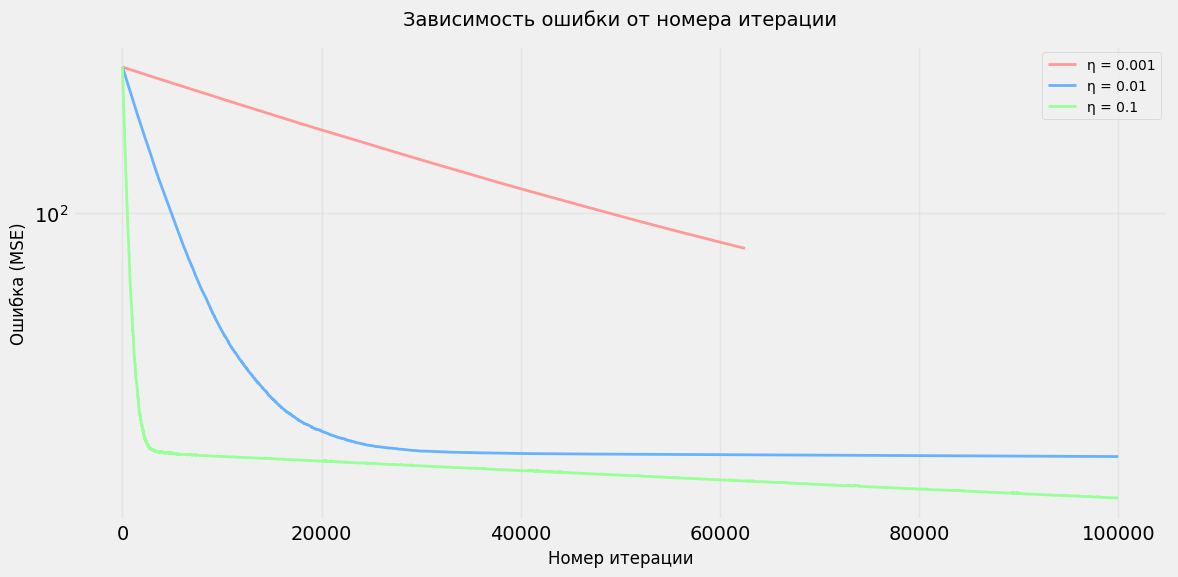

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
# Используем встроенный стиль matplotlib
plt.style.use('fivethirtyeight')  # или 'ggplot', или 'classic'
# Инициализация параметров
n_iterations = 100000
w_init = np.zeros(X.shape[1])
learning_rates = [0.001, 0.01, 0.1]

# Словарь для хранения результатов
results = {}

# Запуск SGD с разными темпами обучения
for eta in learning_rates:
  w_final, errors = stochastic_gradient_descent(
      X, y, w_init.copy(), 
      eta=eta, 
      max_iter=n_iterations, 
      eps=1e-8
  )
  results[eta] = {
      'weights': w_final,
      'errors': errors
  }

# Создание графика
fig, ax = plt.subplots(figsize=(12, 6))

# Цвета для разных темпов обучения
colors = ['#FF9999', '#66B2FF', '#99FF99']

# Построение графиков для каждого темпа обучения
for (eta, result), color in zip(results.items(), colors):
  ax.plot(result['errors'], label=f'η = {eta}', color=color, linewidth=2)

# Настройка графика
ax.set_title('Зависимость ошибки от номера итерации', fontsize=14, pad=15)
ax.set_xlabel('Номер итерации', fontsize=12)
ax.set_ylabel('Ошибка (MSE)', fontsize=12)
ax.set_yscale('log')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10, frameon=True)

# Улучшение внешнего вида
plt.tight_layout()


**Выведите вектор весов, к которому сошелся метод.**

In [16]:
# Вывод весов для каждого темпа обучения
print("Финальные веса для разных темпов обучения:")
for eta, result in results.items():
  mse = result['errors'][-1]  # Последняя ошибка
  weights = result['weights']
  print(f"\nТемп обучения η = {eta}:")
  print(f"MSE: {mse:.6f}")
  print("Веса:")
  print(f"w0 (свободный член) = {weights[0]:.6f}")
  print(f"w1 (TV) = {weights[1]:.6f}")
  print(f"w2 (radio) = {weights[2]:.6f}")
  print(f"w3 (newspaper) = {weights[3]:.6f}")

# Находим темп обучения с наименьшей ошибкой
best_eta = min(results.items(), key=lambda x: x[1]['errors'][-1])[0]
best_weights = results[best_eta]['weights']
best_mse = results[best_eta]['errors'][-1]

print("\n" + "="*50)
print(f"\nНаилучший результат (η = {best_eta}):")
print(f"MSE: {best_mse:.6f}")
print("\nИтоговое уравнение регрессии:")
print(f"sales = {best_weights[0]:.6f} + {best_weights[1]:.6f}*TV + {best_weights[2]:.6f}*radio + {best_weights[3]:.6f}*newspaper")

Финальные веса для разных темпов обучения:

Темп обучения η = 0.001:
MSE: 81.984510
Веса:
w0 (свободный член) = 6.481577
w1 (TV) = 0.458317
w2 (radio) = 0.485423
w3 (newspaper) = 0.457648

Темп обучения η = 0.01:
MSE: 25.890358
Веса:
w0 (свободный член) = 13.613320
w1 (TV) = 0.962607
w2 (radio) = 2.260807
w3 (newspaper) = 1.921300

Темп обучения η = 0.1:
MSE: 20.581506
Веса:
w0 (свободный член) = 12.255788
w1 (TV) = 0.866615
w2 (radio) = 14.137672
w3 (newspaper) = 11.039723


Наилучший результат (η = 0.1):
MSE: 20.581506

Итоговое уравнение регрессии:
sales = 12.255788 + 0.866615*TV + 14.137672*radio + 11.039723*newspaper


**Выведите среднеквадратичную ошибку на последней итерации.**

In [17]:
# Вывод среднеквадратичной ошибки на последней итерации для каждого темпа обучения
print("Среднеквадратичная ошибка (MSE) на последней итерации:")
print("-" * 50)

for eta, result in results.items():
  final_mse = result['errors'][-1]
  print(f"η = {eta:<6} MSE = {final_mse:.6f}")

# Находим наилучший результат
best_eta = min(results.items(), key=lambda x: x[1]['errors'][-1])[0]
best_mse = results[best_eta]['errors'][-1]

print("\nНаилучший результат:")
print(f"Темп обучения η = {best_eta}")
print(f"MSE = {best_mse:.6f}")

# Для сравнения с наивным прогнозом
naive_mse = np.mean((y - np.mean(y))**2)
print(f"\nMSE наивного прогноза: {naive_mse:.6f}")

# Вычисление улучшения относительно наивного прогноза
improvement = ((naive_mse - best_mse) / naive_mse) * 100
print(f"Улучшение относительно наивного прогноза: {improvement:.2f}%")

Среднеквадратичная ошибка (MSE) на последней итерации:
--------------------------------------------------
η = 0.001  MSE = 81.984510
η = 0.01   MSE = 25.890358
η = 0.1    MSE = 20.581506

Наилучший результат:
Темп обучения η = 0.1
MSE = 20.581506

MSE наивного прогноза: 27.085744
Улучшение относительно наивного прогноза: 24.01%
